In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 

filename='Tracks_8000dp_y1990-2021_full.csv'
data = pd.read_csv(filename, index_col=0)
data.head(2)

,Name,Id,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,2021,0.762,0.701,8,-3.541,1,0.0286,0.235,0.000158,0.1230,0.742,110.968
1,Year 2020,08ejYlzduA6O82FJgnFKQz,2021,0.805,0.417,4,-11.722,0,0.0462,0.508,0.020100,0.0903,0.548,129.984


In [6]:
data.dtypes

Name                 object
Id                   object
Year                  int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [7]:
data.shape

(8000, 14)

In [12]:
simplified = data.iloc[:, 2::]
simplified.head(3)

,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2021,0.762,0.701,8,-3.541,1,0.0286,0.235,0.000158,0.1230,0.742,110.968
1,2021,0.805,0.417,4,-11.722,0,0.0462,0.508,0.020100,0.0903,0.548,129.984
2,2021,0.789,0.536,6,-6.862,1,0.2420,0.410,0.000000,0.1290,0.437,81.039


In [19]:
covariance = simplified.cov()
filtered_cov = covariance[ abs(covariance) > 0.5]
filtered_cov

,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Year,85.260658,NaN,NaN,NaN,2.942269,NaN,NaN,NaN,NaN,NaN,NaN,8.803996
danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.913721
energy,NaN,NaN,NaN,NaN,0.617952,NaN,NaN,NaN,NaN,NaN,NaN,1.231698
key,NaN,NaN,NaN,12.609197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111997
loudness,2.942269,NaN,0.617952,NaN,15.740397,NaN,NaN,-0.606087,NaN,NaN,NaN,14.346857
mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,-0.606087,NaN,NaN,NaN,NaN,NaN,NaN,-1.095752
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
covariant_properties = set()
print(type(filtered_cov))

for key in filtered_cov:
    covs = list(filter( lambda x: x != key  ,filtered_cov[key][ filtered_cov[key] > 0  ].keys() ))
    for c in covs:
        if (c, key) not in covariant_properties:
            covariant_properties.add( (key, c) )
    
print('\nCOVARIANT PROPERTIES: ')
covariant_properties

<class 'pandas.core.frame.DataFrame'>

COVARIANT PROPERTIES: 


{('Year', 'loudness'),
 ('Year', 'tempo'),
 ('energy', 'loudness'),
 ('energy', 'tempo'),
 ('key', 'tempo'),
 ('loudness', 'tempo')}

<AxesSubplot:xlabel='loudness', ylabel='tempo'>

<Figure size 432x288 with 0 Axes>

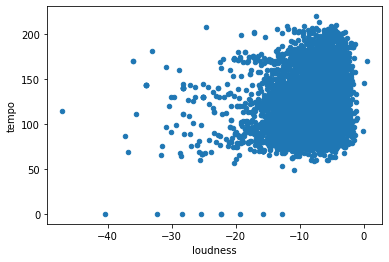

In [69]:

plt.figure()
data.iloc[:8000].plot.scatter(x='loudness', y='tempo')



<AxesSubplot:xlabel='loudness', ylabel='energy'>

<Figure size 432x288 with 0 Axes>

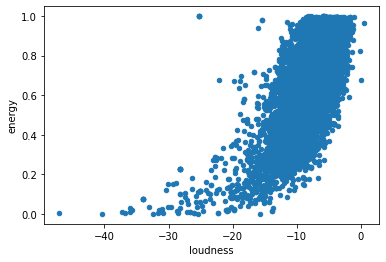

In [68]:
plt.figure()
data.iloc[:8000].plot.scatter(x='loudness', y='energy')

<AxesSubplot:xlabel='tempo', ylabel='energy'>

<Figure size 432x288 with 0 Axes>

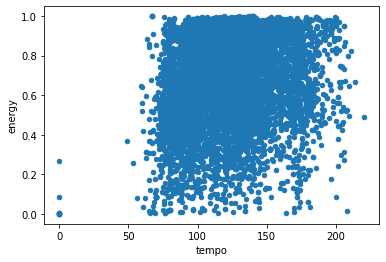

In [70]:

plt.figure()
data.iloc[:8000].plot.scatter(x='tempo', y='energy')

In [87]:
correlated = data.corr() 
correlated =  correlated[abs(correlated) > 0.5]

correlated

,Year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy,NaN,NaN,1.000000,NaN,0.704973,NaN,NaN,-0.694232,NaN,NaN,NaN,NaN
key,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,NaN,0.704973,NaN,1.000000,NaN,NaN,-0.538831,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,-0.694232,NaN,-0.538831,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [94]:
correlated_properties = set()
print(type(correlated))

for key in correlated:
    print(key, list( abs(correlated[key][ correlated[key]) > 0  ].keys()) )
   
    
print('\nCORRELATED PROPERTIES: ')
correlated_properties

<class 'pandas.core.frame.DataFrame'>
Year ['Year']
danceability ['danceability']
energy ['energy', 'loudness']
key ['key']
loudness ['energy', 'loudness']
mode ['mode']
speechiness ['speechiness']
acousticness ['acousticness']
instrumentalness ['instrumentalness']
liveness ['liveness']
valence ['valence']
tempo ['tempo']

CORRELATED PROPERTIES: 


set()